In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
heart = pd.read_csv('Heart Disease.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X = heart.drop('target',axis=1)
y = heart['target']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logr = LogisticRegression()

In [15]:
logr.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
pred = logr.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        48
           1       0.84      0.92      0.88        52

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [19]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[39  9]
 [ 4 48]]


The Visualization of the Confusion Matrix


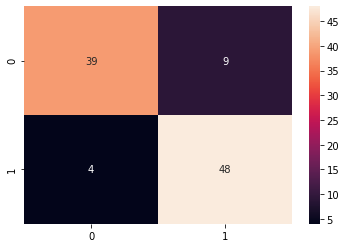

In [20]:
print('The Visualization of the Confusion Matrix')
sns.heatmap(cm,annot=True)

In [21]:
modelscore = logr.score(X_test,y_test)

In [22]:
modelscore

0.87

In [23]:
import pickle

In [24]:
filename = 'trained_model.sav'
pickle.dump(logr,open(filename,'wb'))

In [25]:
loadhm = pickle.load(open('trained_model.sav','rb'))

In [30]:
input_data = (57,1,2,150,168,0,1,174,0,1.6,2,0,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loadhm.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
      print('The person is free from heart disease')
else:
      print('The person is likely to develop heart disease')

[1]
The person is likely to develop heart disease
